# Connecting to Databases

## Using R

See examples/r-databases.ipynb for how to connect using R

## Using plain SQL

This will show us how to run raw sql against available databases.

### Setting up

First, we need to enable SQL:

In [ ]:
%load_ext sql

### Making queries in plain SQL

Now that SQL is loaded, blocks whose first line is `%sql` will read as queries:

In [11]:
%%sql --save section_counts
SELECT assigned_section, COUNT(*) FROM cts_forms_report
-- WHERE status = 'new'
GROUP BY assigned_section
ORDER BY assigned_section

*  postgresql://analytics:***@db:5432/postgres
12 rows affected.


assigned_section,count
ADM,248
APP,251
CRM,287
DRS,2775
ELS,255
EOS,251
FCS,245
HCE,245
IER,238
POL,269


### Using the results

You can then query the results directly into python variables for analysis:

In [12]:
results = %sql --with section_counts SELECT * FROM section_counts;
print(results)

*  postgresql://analytics:***@db:5432/postgres
12 rows affected.
+------------------+-------+
| assigned_section | count |
+------------------+-------+
|       ADM        |  248  |
|       APP        |  251  |
|       CRM        |  287  |
|       DRS        |  2775 |
|       ELS        |  255  |
|       EOS        |  251  |
|       FCS        |  245  |
|       HCE        |  245  |
|       IER        |  238  |
|       POL        |  269  |
|       SPL        |  358  |
|       VOT        |  386  |
+------------------+-------+


Or, we can get fancy (make sure to run the above, first, as we're re-using the `results` variable!):

<BarContainer object of 12 artists>

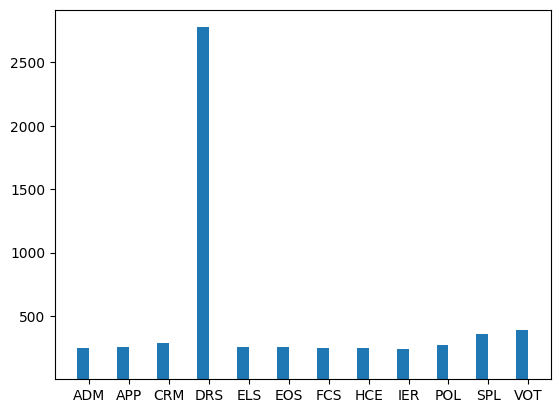

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

df = results.DataFrame()

plt.bar(x=df['assigned_section'], 
        height=df['count'],
        width=-0.3, 
        bottom=1, 
        align="edge")